<a href="https://colab.research.google.com/github/moraish/AMS580/blob/main/AMS_580_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Exploratory Data Analysis

## 1.1 Reading the Datasets

- ? in the datasets are treated as missing values = c(" ?", "?", "? ") because we had leading and trailing spaces around the '?' missing value
- Leading and trailing spaces are removed

In [ ]:
library(dplyr)
library(ggplot2)

In [ ]:
train = read.csv('/content/train.csv', na.strings = c(" ?", "?", "? "), strip.white = TRUE)
test = read.csv('/content/test.csv', na.strings = c(" ?", "?", "? "), strip.white = TRUE)

In [ ]:
head(train)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [ ]:
print("Dimensions of training data (rows, columns):")
print(dim(train))

[1] "Dimensions of training data (rows, columns):"
[1] 26049    15


In [ ]:
print("Summary statistics for training data:")
summary(train)

[1] "Summary statistics for training data:"


      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:26049       Min.   :  12285   Length:26049      
 1st Qu.:28.00   Class :character   1st Qu.: 118001   Class :character  
 Median :37.00   Mode  :character   Median : 178778   Mode  :character  
 Mean   :38.56                      Mean   : 189801                     
 3rd Qu.:48.00                      3rd Qu.: 237305                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:26049       Length:26049       Length:26049      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

## 1.2 Target Variable Analysis

In [ ]:
# Frequency table
print("Frequency table for income:")
print(table(train$income))

# Proportion table
print("Proportion table for income:")
print(prop.table(table(train$income)))

[1] "Frequency table for income:"

 <=50K   >50K 
 19776   6273 
[1] "Proportion table for income:"

    <=50K      >50K 
0.7591846 0.2408154 


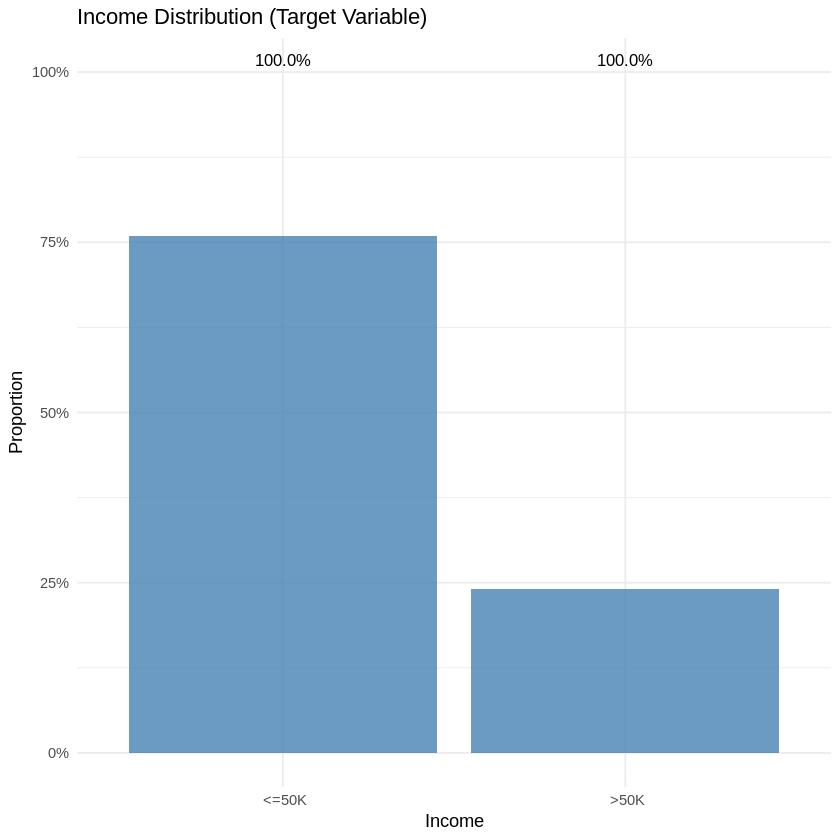

In [ ]:
ggplot(train, aes(x = income)) +
  geom_bar(aes(y = ..prop.., group = 1), fill = "steelblue", alpha = 0.8) + # Use ..prop.. for proportion
  geom_text(aes( label = scales::percent(..prop.., accuracy = 0.1),
                 y= ..prop.. ), stat= "count", vjust = -0.5, size = 3.5) +
  labs(title = "Income Distribution (Target Variable)",
       x = "Income",
       y = "Proportion") +
  scale_y_continuous(labels = scales::percent) +
  theme_minimal()

### ***Observation***

We notice a class imbalance, and might need to handle this using stratified sampling, or using techniques like SMOTE.

## 1.3 Missing Variable Analysis

In [ ]:
print("Missing values per column:")
na_counts <- colSums(is.na(train))
print(na_counts[na_counts > 0])

[1] "Missing values per column:"
     workclass     occupation native.country 
          1471           1476            450 


In [ ]:
total_rows <- nrow(train)

# Proportion of NAs per column
na_proportion <- na_counts / total_rows

# Print only columns with missing values (non-zero NA count)
print("Missing values (count and percentage) per column:")
na_info <- data.frame(
  Count = na_counts[na_counts > 0],
  Percentage = round(100 * na_proportion[na_counts > 0], 2)
)
print(na_info)

[1] "Missing values (count and percentage) per column:"
               Count Percentage
workclass       1471       5.65
occupation      1476       5.67
native.country   450       1.73


### ***Observation***

Only a small portion ~5% of the data is missing for workclass and occupation. Therefore we should consider imputation of this data (as this would be effective) rather than dropping the rows.

## 1.4 Univariate Analysis

In [ ]:
# Getting the numeric columns
numeric_cols <- names(train)[sapply(train, is.numeric)]

# Getting the categorical columns
categorical_cols <- names(train)[sapply(train, function(x) is.character(x) || is.factor(x))]

# Removing income from the categorical cols
categorical_cols <- setdiff(categorical_cols, "income")

print(paste("Numeric columns:", paste(numeric_cols, collapse=", ")))
print(paste("Categorical columns:", paste(categorical_cols, collapse=", ")))


[1] "Numeric columns: age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week"
[1] "Categorical columns: workclass, education, marital.status, occupation, relationship, race, sex, native.country"


[1] "Generating histograms for numerical features..."


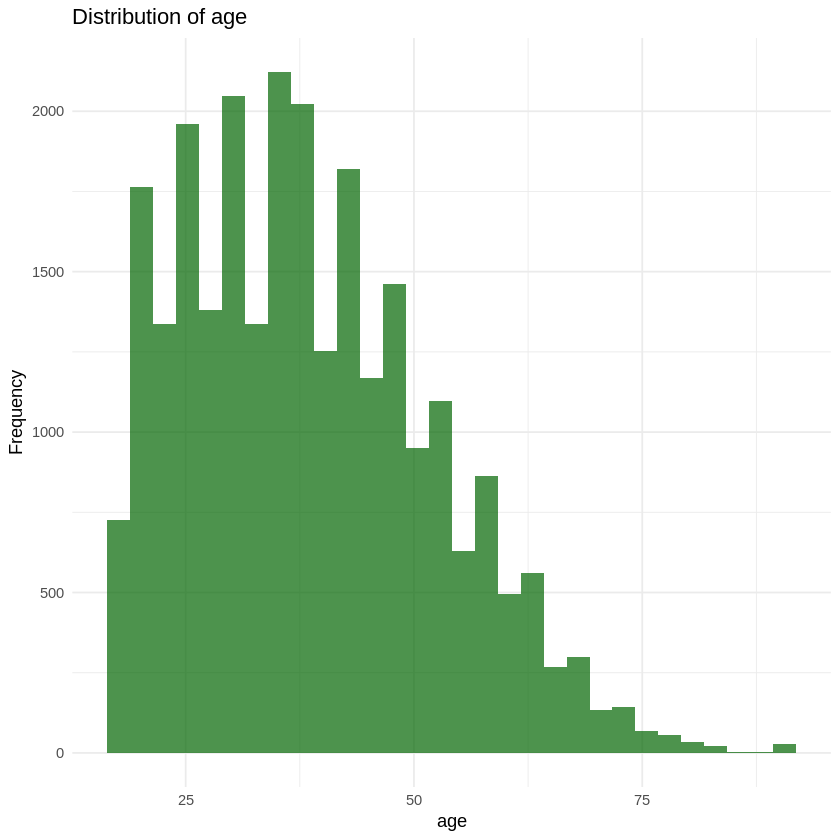

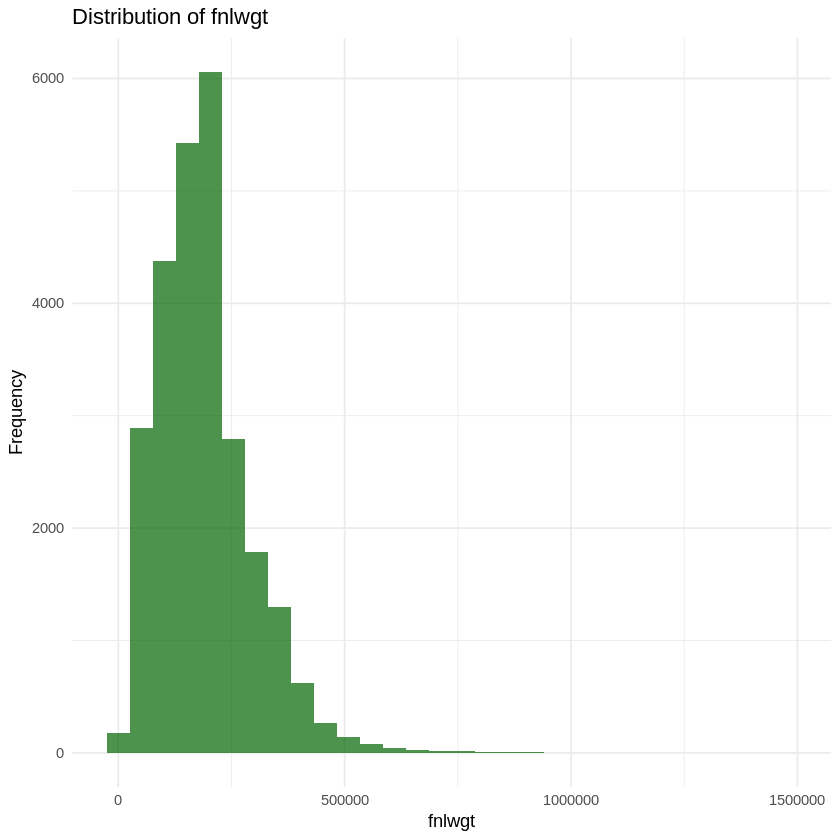

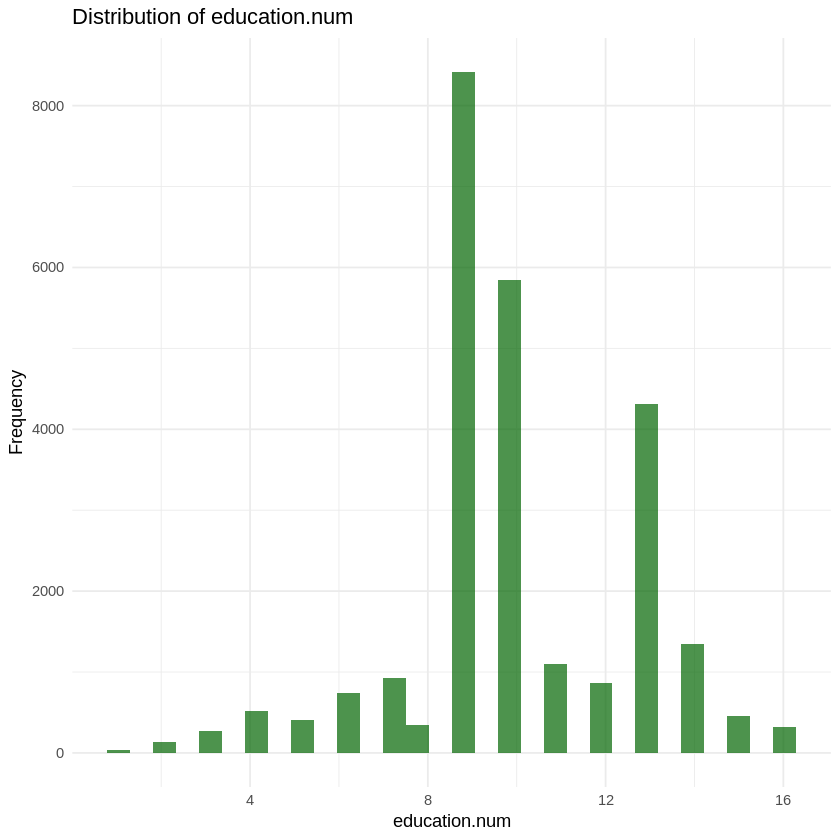

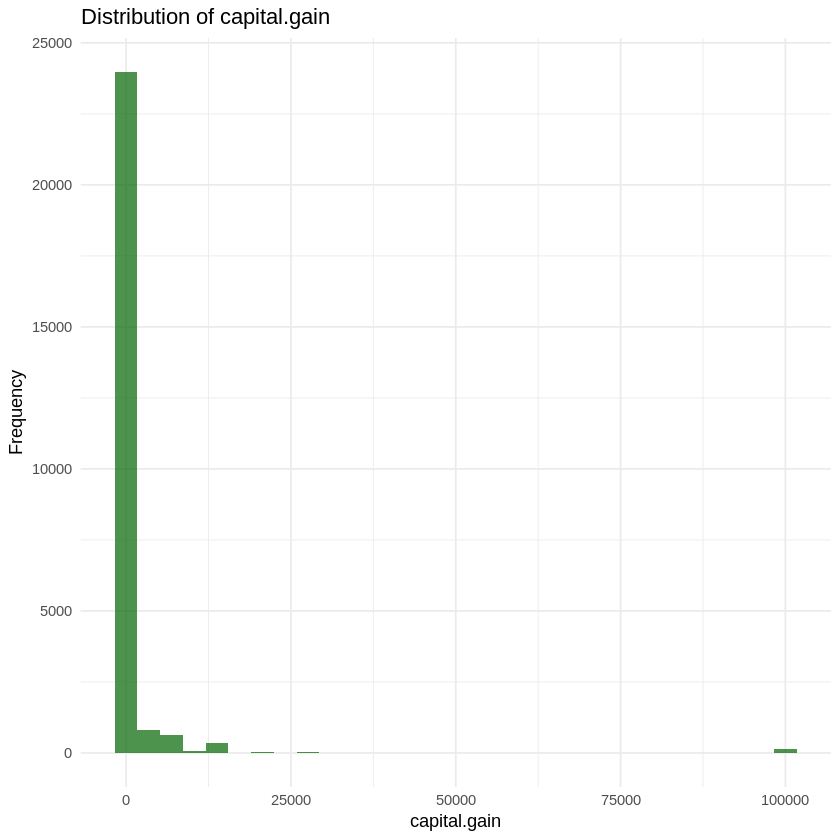

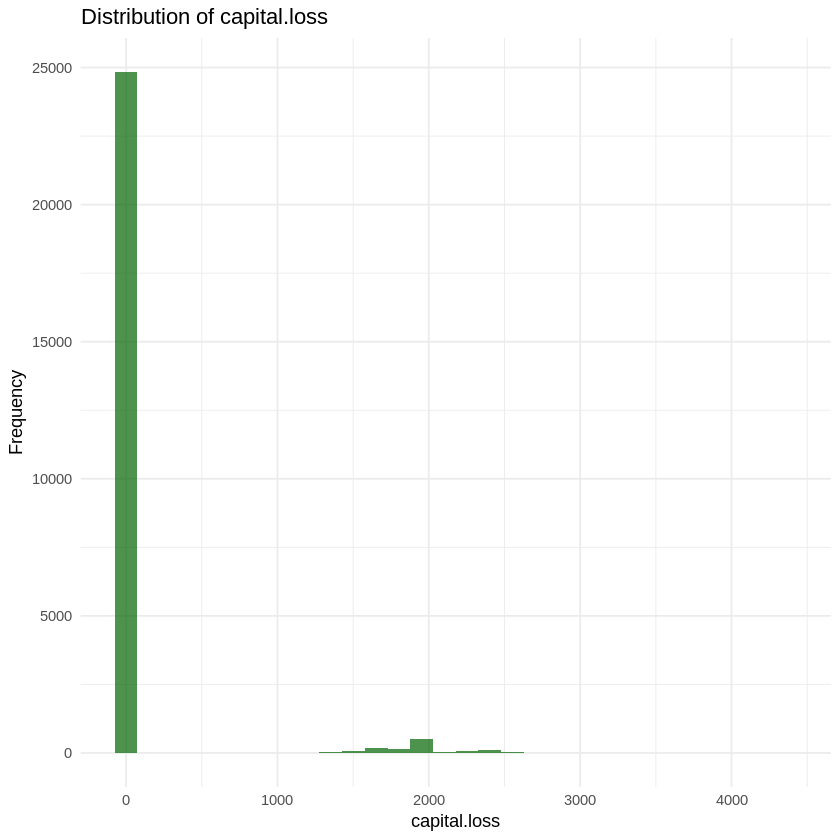

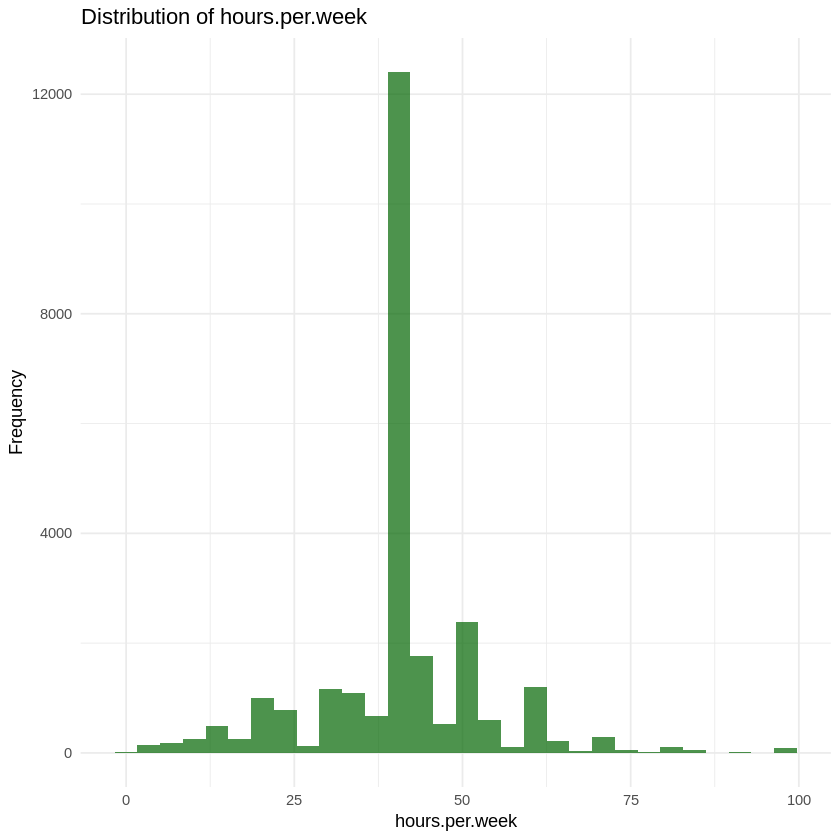

In [ ]:
print("Generating histograms for numerical features...")
for (col in numeric_cols) {
  p <- ggplot(train, aes_string(x = col)) +
    geom_histogram(bins = 30, fill = "darkgreen", alpha = 0.7) +
    labs(title = paste("Distribution of", col), x = col, y = "Frequency") +
    theme_minimal()
  print(p)
}

[1] "Generating bar charts for categorical features..."


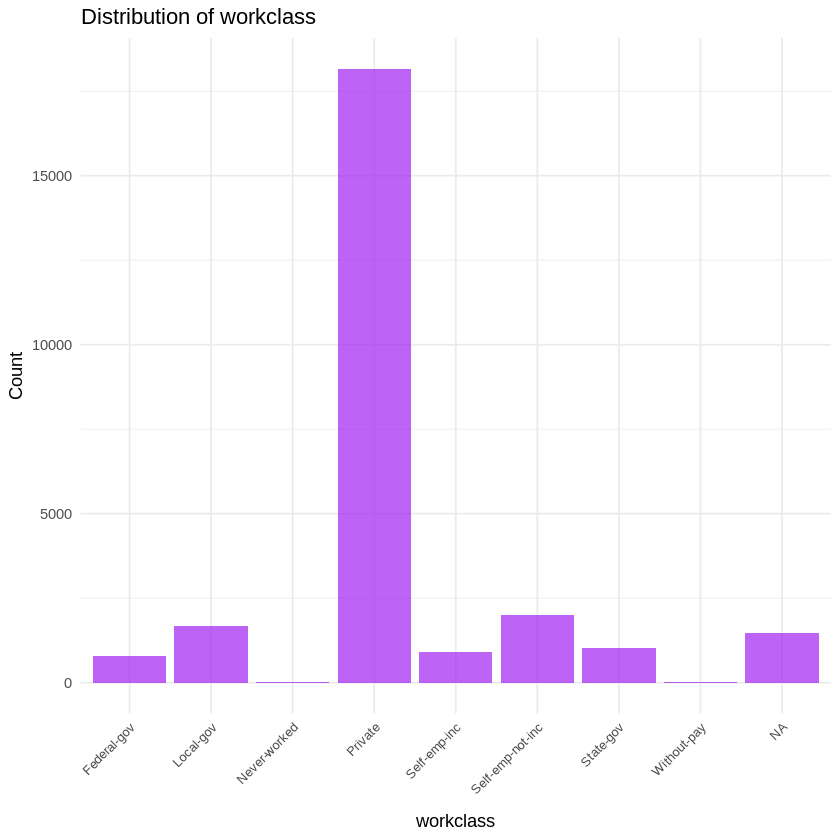

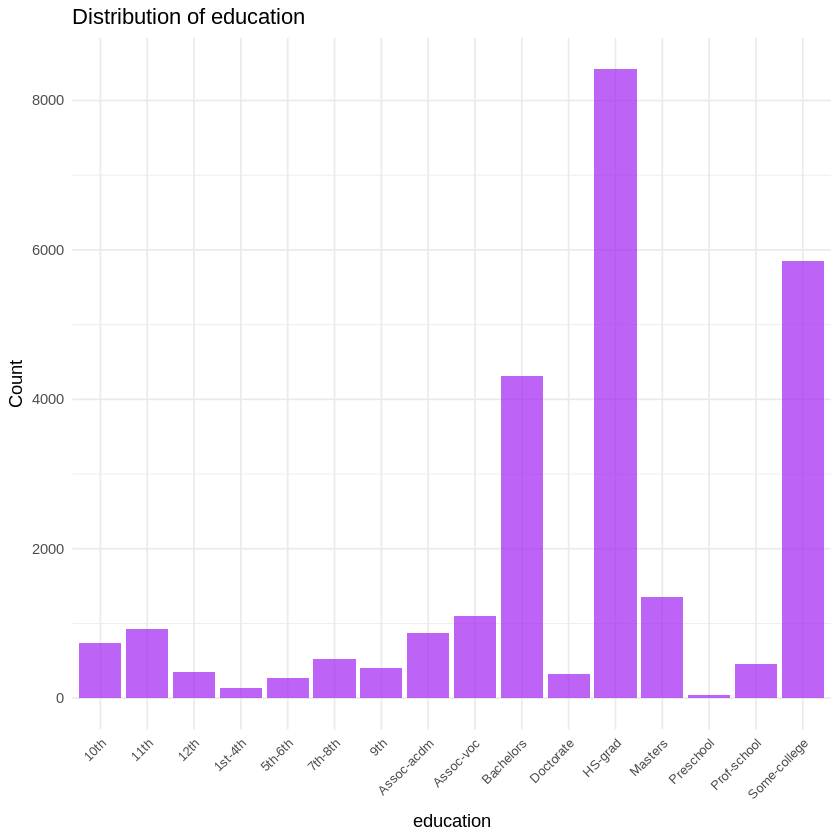

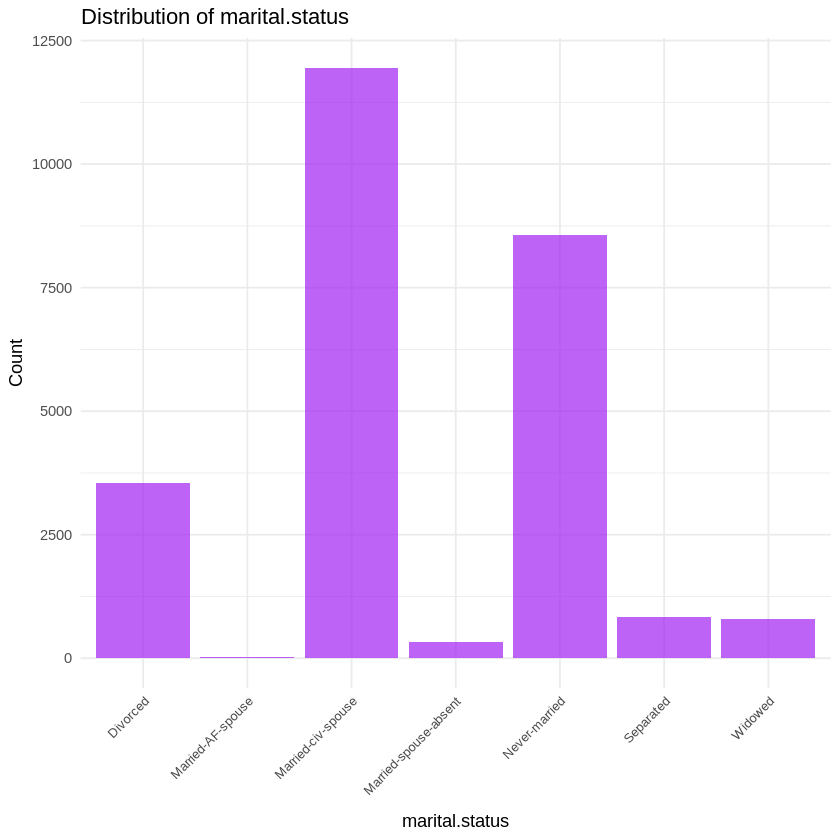

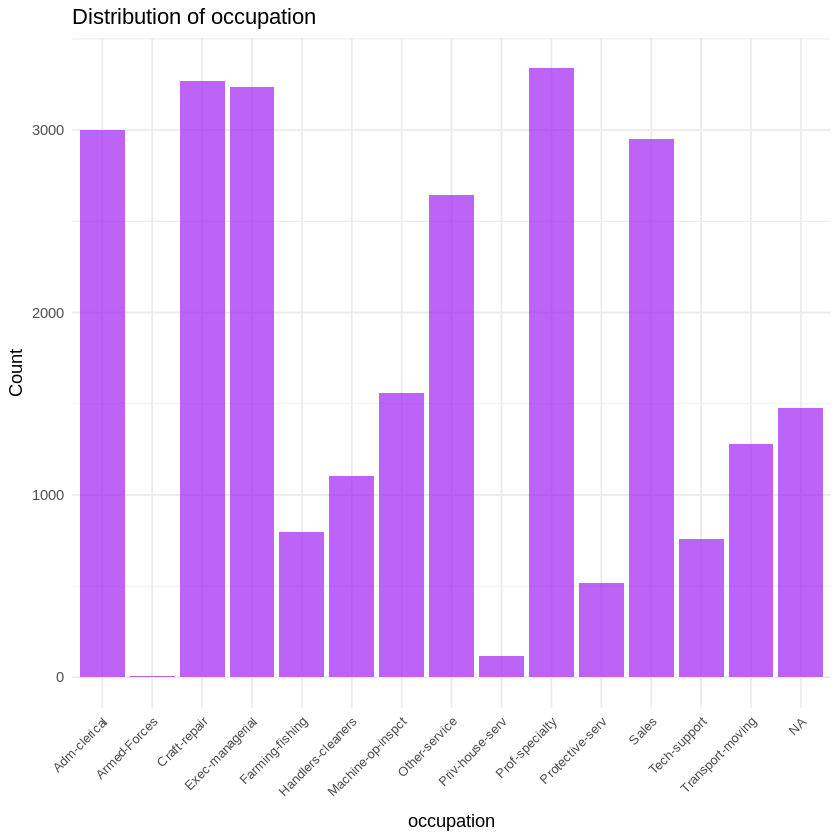

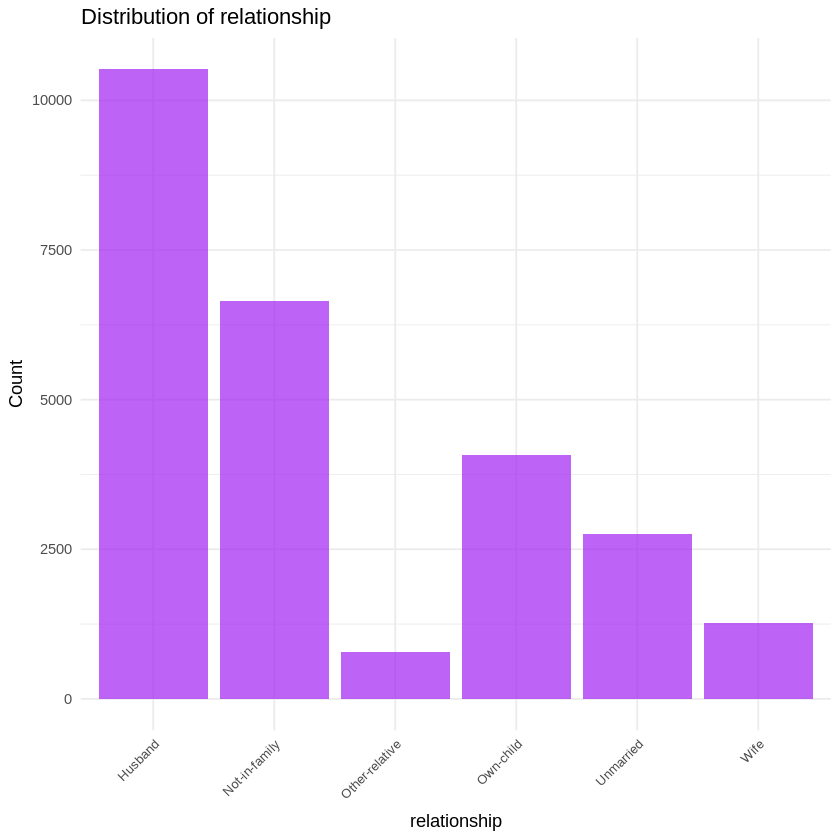

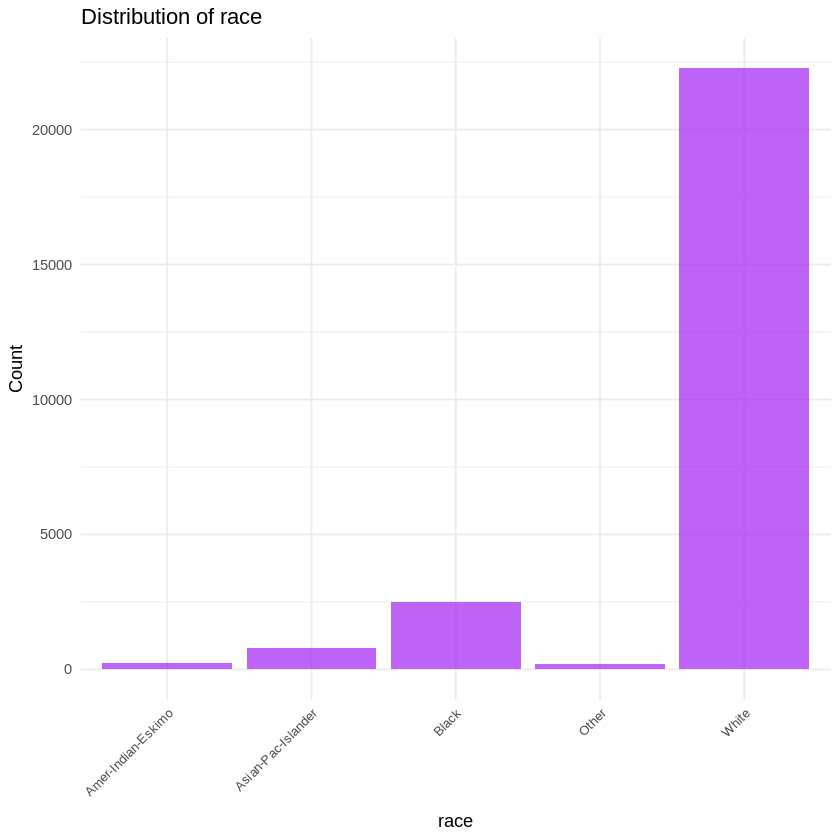

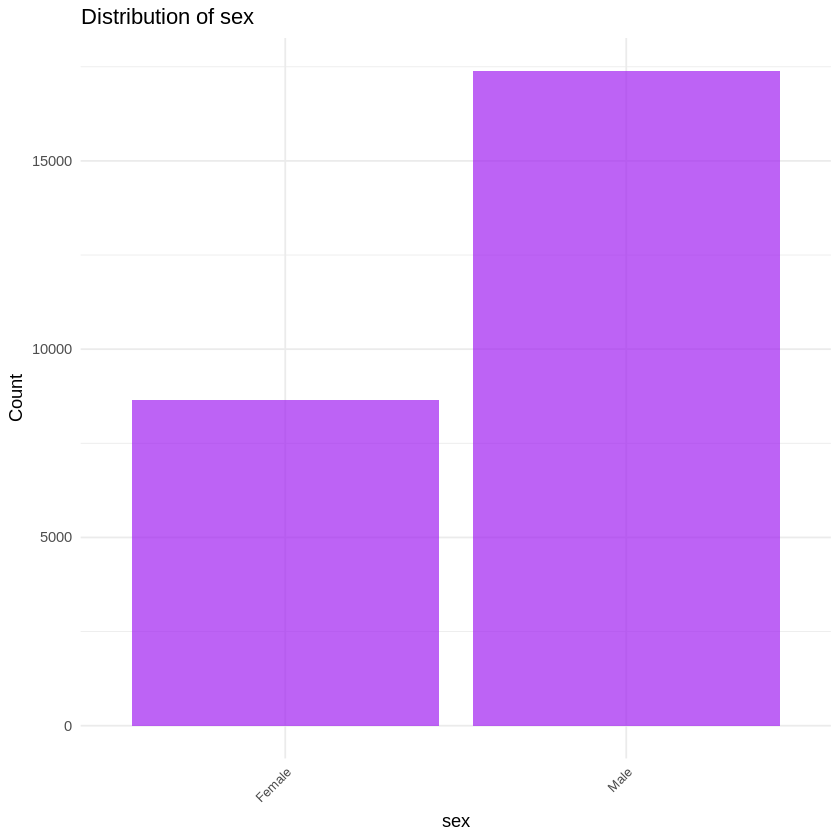

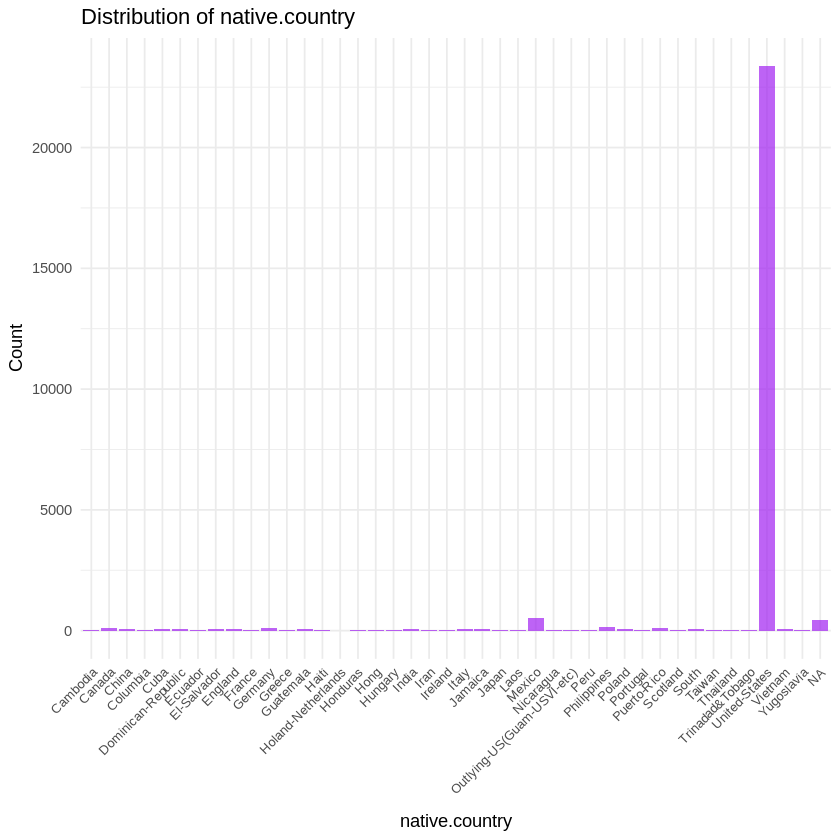

In [ ]:
print("Generating bar charts for categorical features...")
for (col in categorical_cols) {
  # Handling potentially large number of categories (e.g., native-country)
  # Option 1: Show all (might be messy for native-country)
   p <- ggplot(train, aes_string(x = col)) +
     geom_bar(fill = "purple", alpha = 0.7) +
     labs(title = paste("Distribution of", col), x = col, y = "Count") +
     theme_minimal() +
     theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8)) # Rotate labels
   print(p)
}

### ***Observation***

Most of the observations are US, so we might be okay to group all other countries under NA / Other.

## 1.5 Multivariate Analysis

In [ ]:
# Inporting library for correlation plot
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Calculating and plotting correlation matrix for numerical features..."
[1] "Correlation Matrix:"
                 age fnlwgt education.num capital.gain capital.loss
age             1.00  -0.08          0.03         0.08         0.06
fnlwgt         -0.08   1.00         -0.05         0.01        -0.01
education.num   0.03  -0.05          1.00         0.12         0.08
capital.gain    0.08   0.01          0.12         1.00        -0.03
capital.loss    0.06  -0.01          0.08        -0.03         1.00
hours.per.week  0.07  -0.02          0.14         0.08         0.05
               hours.per.week
age                      0.07
fnlwgt                  -0.02
education.num            0.14
capital.gain             0.08
capital.loss             0.05
hours.per.week           1.00


pdf 
  2

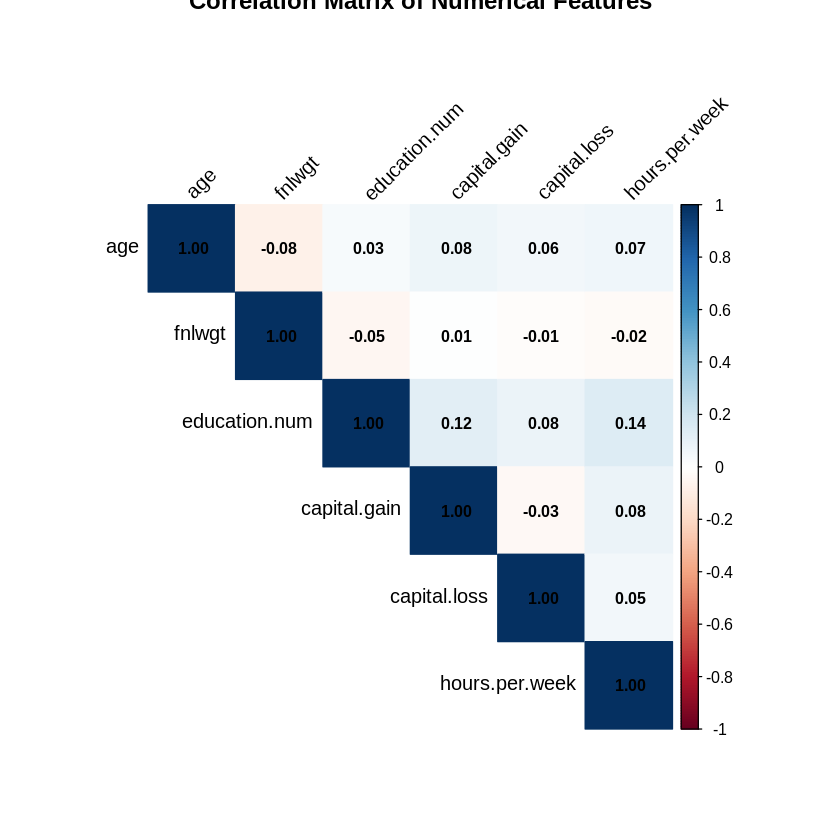

In [ ]:
print("Calculating and plotting correlation matrix for numerical features...")

# Select only numeric columns from train dataset
numeric_train_data <- train %>% select_if(is.numeric)

cor_matrix <- cor(numeric_train_data, use = "pairwise.complete.obs")

print("Correlation Matrix:")
print(round(cor_matrix, 2))

# Set up a larger plotting area
png("correlation_matrix.png", width = 1200, height = 1000, res = 100)

# Visualize the correlation matrix with larger numbers
corrplot(cor_matrix,
         method = "color",  # Use colors for better visibility
         type = "upper",
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",  # Add correlation coefficients
         number.cex = 0.8,       # Control size of numbers
         title = "Correlation Matrix of Numerical Features",
         mar = c(0, 0, 2, 0))    # Adjust margins

dev.off()

# For direct viewing in RStudio, you can also do:
corrplot(cor_matrix,
         method = "color",
         type = "upper",
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 0.8,
         title = "Correlation Matrix of Numerical Features")

## 1.6 Adhoc analysis

1. Education and Education_number seem to be the same columns.

In [ ]:
education_mapping <- train %>%
  select(education, education.num) %>%
  distinct() %>%
  arrange(education.num)

# Print the mapping
print(education_mapping)

       education education.num
1      Preschool             1
2        1st-4th             2
3        5th-6th             3
4        7th-8th             4
5            9th             5
6           10th             6
7           11th             7
8           12th             8
9        HS-grad             9
10  Some-college            10
11     Assoc-voc            11
12    Assoc-acdm            12
13     Bachelors            13
14       Masters            14
15   Prof-school            15
16     Doctorate            16


### ***Observation***

Looks like education number is just the numeric representation of the education column, therefore we can drop one of them, (mostly the categorical column). The numeric column is also ordinal.

# 2.0 PreProcessing

Based on the observations from the EDA, we are going to applying the following transformations.




1.   Target Variable - Convert into Binary numeric format.
2.   Drop columns - i. fnlwgt - weight factor used by create population estimates, ii. education - as we have education_num which is just the numeric representation.
3. Remove whitespace - leading and trailing for character cols.  
4. Missing values - inputation (using the most frequent value)
5. Feature Engineering - For country, updating everything other than US to other.
6. Categorical Features - One Hot Encoding.
7. Scaling - We can scale the numeric data to have 0 mean, and unit variance.


*** Note: *** Exploring the recipies package from R. This will ensure that the same preprocessing steps are applied both to the train and test datasets.

In [ ]:
install.packages("recipes")
install.packages("dplyr")
install.packages("forcats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(recipes)
library(dplyr)
library(forcats)


Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step




In [ ]:
print("Original Training Columns:")
print(names(train))
print("Original Test Columns:")
print(names(test))

[1] "Original Training Columns:"
 [1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education.num"  "marital.status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital.gain"   "capital.loss"  
[13] "hours.per.week" "native.country" "income"        
[1] "Original Test Columns:"
 [1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education.num"  "marital.status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital.gain"   "capital.loss"  
[13] "hours.per.week" "native.country" "income"        


### 2.1 Creating the Recipe

- This step defines the transformations that need to be applied one after another.

In [ ]:
adult_recipe <- recipe(income ~ ., data = train) %>%
  # Step 1: Target Variable
  step_mutate(income = ifelse(income == ">50K", 1, 0)) %>%

  # Step 2: Drop Columns
  step_rm(fnlwgt, education) %>%

  # Step 3: Trim whitespace from specific character columns
  step_mutate(across(c(workclass, occupation, native.country, marital.status, relationship, race, sex), trimws)) %>%

  # Step 4: Impute Missing Values (will respect column type)
  step_impute_mode(workclass, occupation, native.country) %>%

  # Step 5: Feature Engineering - Group 'native_country'
  # Ensure it's a factor before fct_other, as fct_other requires factor input
  step_mutate(native.country = as.factor(native.country)) %>%
  step_mutate(native.country = forcats::fct_other(native.country,
                                                 keep = "United-States",
                                                 other_level = "Other")) %>%

  # Step 5.5: Convert all nominal (character or factor) predictors to factors
  # This ensures columns like workclass, occupation, etc., are factors before step_dummy
  # It will correctly handle native.country which is already a factor.
  step_string2factor(all_nominal_predictors()) %>%

  # Step 6: Categorical Features - One-Hot Encoding
  # Now this step will only receive factor predictors, as required.
  step_dummy(all_nominal_predictors()) %>%

  # Remove columns with only one value (useful after dummy encoding)
  step_zv(all_predictors()) %>%

  # Step 7: Scaling Numeric Predictors
  step_normalize(all_numeric_predictors())

print("Defined Preprocessing Recipe:")
print(adult_recipe)

[1] "Defined Preprocessing Recipe:"




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 14



── Operations 

• Variable mutation for: ifelse(income == ">50K", 1, 0)

• Variables removed: fnlwgt education

• Variable mutation for: across(c(workclass, occupation, native.country,
  marital.status, relationship, race, sex), trimws)

• Mode imputation for: workclass, occupation, native.country

• Variable mutation for: as.factor(native.country)

• Variable mutation for: forcats::fct_other(native.country, keep =
  "United-States", other_level = "Other")

• Factor variables from: all_nominal_predictors()

• Dummy variables from: all_nominal_predictors()

• Zero variance filter on: all_predictors()

• Centering and scaling for: all_numeric_predictors()



### 2.2 Baking the recipe

- This step applies the defined transformations on the train and test datasets.

*** prep() ***

- For step_normalize(): It calculates the mean and standard deviation of each numeric predictor
- For step_impute_mode(): It determines the most frequent value for each specified column
- For step_dummy(): It identifies all unique levels in categorical variables
- For step_zv(): It identifies which columns have zero variance

In [ ]:

print("Preparing the recipe (learning parameters from training data)...")

prepared_recipe <- prep(adult_recipe, training = train)
print("Recipe prepared.")
print(prepared_recipe)

# Apply the prepared recipe to the training data
print("Applying recipe to training data...")
train_processed <- bake(prepared_recipe, new_data = train)
print("Training data processed.")



[1] "Preparing the recipe (learning parameters from training data)..."
[1] "Recipe prepared."




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 14



── Training information 

Training data contained 26049 data points and 1902 incomplete rows.



── Operations 

• Variable mutation for: ~ifelse(income == ">50K", 1, 0) | Trained

• Variables removed: fnlwgt education | Trained

• Variable mutation for: ~across(c(workclass, occupation, native.country,
  marital.status, relationship, race, sex), trimws) | Trained

• Mode imputation for: workclass, occupation, native.country | Trained

• Variable mutation for: ~as.factor(native.country) | Trained

• Variable mutation for: ~forcats::fct_other(native.country, keep =
  "United-States", other_level = "Other") | Trained

• Factor variables from: workclass marital.status, ... | Trained

• Dummy variables from: workclass, marital.status, occupation, ... | Trained

• Zero variance filter removed: <none> | Trained

• Centering and scaling f

[1] "Applying recipe to training data..."
[1] "Training data processed."


In [ ]:
# Apply the prepared recipe to the test data
print("Applying recipe to test data...")
test_processed <- bake(prepared_recipe, new_data = test)
print("Test data processed.")


[1] "Applying recipe to test data..."
[1] "Test data processed."


### 2.3  Verification

In [ ]:


# Check the results
print("Dimensions of processed training data:")
print(dim(train_processed))
print("First few rows of processed training data:")
print(head(train_processed))

print("Dimensions of processed test data:")
print(dim(test_processed))
print("First few rows of processed test data:")
print(head(test_processed))

# Check data types in processed data (should be numeric/integer)
print("Structure of processed training data:")
glimpse(train_processed)

# Check for NAs in processed data (should be none if imputation worked)
print("Missing values count in processed training data:")
print(sum(is.na(train_processed)))
print("Missing values count in processed test data:")
print(sum(is.na(test_processed)))

[1] "Dimensions of processed training data:"
[1] 26049    43
[1] "First few rows of processed training data:"
# A tibble: 6 × 43
      age education.num capital.gain capital.loss hours.per.week income
    <dbl>         <dbl>        <dbl>        <dbl>          <dbl> <fct> 
1  0.840          1.14        -0.146       -0.217        -2.23   NA    
2 -0.0412        -0.423       -0.146       -0.217        -0.0363 NA    
3  1.06          -1.20        -0.146       -0.217        -0.0363 NA    
4 -0.775          1.14        -0.146       -0.217        -0.0363 NA    
5  0.766         -1.98        -0.146       -0.217        -1.98   NA    
6  0.987         -0.423       -0.146       -0.217         0.370  NA    
# ℹ 37 more variables: workclass_Local.gov <dbl>, workclass_Never.worked <dbl>,
#   workclass_Private <dbl>, workclass_Self.emp.inc <dbl>,
#   workclass_Self.emp.not.inc <dbl>, workclass_State.gov <dbl>,
#   workclass_Without.pay <dbl>, marital.status_Married.AF.spouse <dbl>,
#   marital.status

# 3.0 Model Building and Training

1.   Perform stratification to deal with class imbalance (income)
2.   List item





In [ ]:
# Install necessary packages if you haven't already
install.packages("rsample")
install.packages("parsnip")
install.packages("workflows")
install.packages("ranger") # For Random Forest
install.packages("xgboost") # For XGBoost
install.packages("glmnet") # Often used by parsnip's logistic_reg

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘warp’, ‘furrr’, ‘slider’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘modelenv’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’




In [ ]:
library(rsample)
library(parsnip)
library(workflows)
library(dplyr)
library(ranger)
library(xgboost)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




### 3.1 Stratification - Data Splitting

In [ ]:
# Converting income from numeric to factor as some models prefer classification over factors, and stratification requires factors
train_processed <- train_processed %>%
  mutate(income = factor(income, levels = c(0, 1), labels = c("lte50k", "gt50k")))

In [ ]:
head(train_processed$income)

[1] <NA> <NA> <NA> <NA> <NA> <NA>
Levels: lte50k gt50k

In [ ]:
print("Income variable type after converting to factor:")
print(class(train_processed$income))
print("Levels of income factor:")
print(levels(train_processed$income))
print("Table of income factor:")
print(table(train_processed$income))

[1] "Income variable type after converting to factor:"
[1] "factor"
[1] "Levels of income factor:"
[1] "lte50k" "gt50k" 
[1] "Table of income factor:"

lte50k  gt50k 
     0      0 


In [ ]:
set.seed(123)

# Create the split object (80% training, 20% validation)
# Stratifying ensures the proportion of 'income' levels is similar in both splits
data_split <- initial_split(train_processed, prop = 0.80, strata = income)

# Extract the training and validation sets
train_split <- training(data_split)
val_split   <- testing(data_split)

# Verify the dimensions and income proportions
print("Dimensions of Training Split:")
print(dim(train_split))
print("Dimensions of Validation Split:")
print(dim(val_split))


In [ ]:
print("Income Proportions in Training Split:")
print(prop.table(table(train_split$income)))
print("Income Proportions in Validation Split:")
print(prop.table(table(val_split$income))) # Should be very similar to training split